Author Name - **Dhruv Goel**

dhruv.goel_da17@gla.ac.in

# Data Science Case Study (Beer Review Prediction)

### Data Cleaning and Data Pre-processing

In [1]:
# Importing libraries

# Data Analysis & Wrangling
import pandas as pd
import numpy as np
import re
import string

#Sentiment Analysis
from textblob import TextBlob

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from matplotlib.ticker import AutoMinorLocator
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import LeaveOneOut

In [2]:
df = pd.read_csv('train.csv')
df.shape

(37500, 19)

In [3]:
df.head()

,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeStruct,review/timeUnix,user/ageInSeconds,user/birthdayRaw,user/birthdayUnix,user/gender,user/profileName
0,40163,5.0,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,"{'min': 38, 'hour': 3, 'mday': 16, 'sec': 10, ...",1229398690,NaN,NaN,NaN,NaN,RblWthACoz
1,8135,11.0,3003,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,"{'min': 38, 'hour': 23, 'mday': 8, 'sec': 58, ...",1218238738,NaN,NaN,NaN,NaN,BeerSox
2,10529,4.7,961,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,"{'min': 7, 'hour': 18, 'mday': 26, 'sec': 2, '...",1101492422,NaN,NaN,NaN,Male,mschofield
3,44610,4.4,429,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,"{'min': 7, 'hour': 1, 'mday': 20, 'sec': 5, 'y...",1308532025,1.209827e+09,"Aug 10, 1976",208508400.0,Male,molegar76
4,37062,4.4,4904,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,"{'min': 51, 'hour': 6, 'mday': 12, 'sec': 48, ...",1299912708,NaN,NaN,NaN,NaN,Brewbro000


#### Required columns:

beer/ABV, beer/name, beer/style, review/appearance, review/aroma, review/overall, review/palate, review/taste, review/text, review/timeStruct

In [4]:
df.describe(include='all')[['beer/ABV','beer/name','beer/style','review/appearance','review/aroma','review/overall','review/palate','review/taste','review/text']]

,beer/ABV,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text
count,37500.000000,37500,37500,37500.000000,37500.000000,37500.00000,37500.000000,37500.000000,37490
unique,NaN,1688,95,NaN,NaN,NaN,NaN,NaN,37482
top,NaN,Founders Breakfast Stout,American Double / Imperial Stout,NaN,NaN,NaN,NaN,NaN,This is my first real maibock so I may be bias...
freq,NaN,1883,4495,NaN,NaN,NaN,NaN,NaN,2
mean,7.403725,NaN,NaN,3.900053,3.873240,3.88944,3.854867,3.922440,NaN
std,2.318145,NaN,NaN,0.588778,0.680865,0.70045,0.668068,0.716504,NaN
min,0.100000,NaN,NaN,0.000000,1.000000,0.00000,1.000000,1.000000,NaN
25%,5.400000,NaN,NaN,3.500000,3.500000,3.50000,3.500000,3.500000,NaN
50%,6.900000,NaN,NaN,4.000000,4.000000,4.00000,4.000000,4.000000,NaN
75%,9.400000,NaN,NaN,4.500000,4.500000,4.50000,4.500000,4.500000,NaN


In [5]:
df.dtypes

index                  int64
beer/ABV             float64
beer/beerId            int64
beer/brewerId          int64
beer/name             object
beer/style            object
review/appearance    float64
review/aroma         float64
review/overall       float64
review/palate        float64
review/taste         float64
review/text           object
review/timeStruct     object
review/timeUnix        int64
user/ageInSeconds    float64
user/birthdayRaw      object
user/birthdayUnix    float64
user/gender           object
user/profileName      object
dtype: object

In [6]:
# Looking at most frequent Beer

df['beer/name'].value_counts().head(10)

Founders Breakfast Stout                   1883
Founders KBS (Kentucky Breakfast Stout)    1441
Founders Centennial IPA                    1064
Founders Red's Rye PA                      1051
Founders Dirty Bastard                      983
Pilsner Urquell                             947
Founders Double Trouble                     857
Founders Imperial Stout                     805
Founders Devil Dancer                       800
Founders Backwoods Bastard                  778
Name: beer/name, dtype: int64

In [7]:
# Looking at most frequent style/brand

df['beer/style'].value_counts().head(10)

American Double / Imperial Stout    4495
American IPA                        3050
American Double / Imperial IPA      2872
Scotch Ale / Wee Heavy              2133
Russian Imperial Stout              2032
American Pale Ale (APA)             1711
American Porter                     1687
Rauchbier                           1462
Rye Beer                            1355
Czech Pilsener                      1131
Name: beer/style, dtype: int64

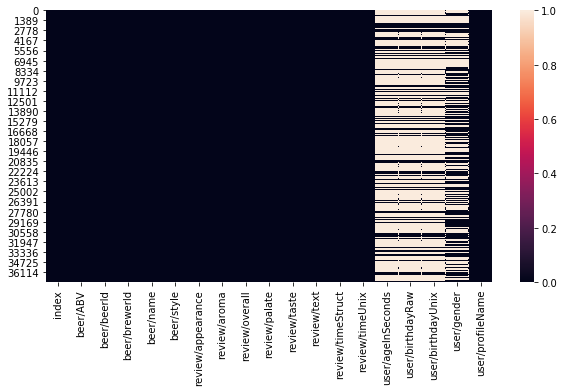

In [8]:
# Is there any null values - via heatmap

plt.figure(figsize=(10,5))
ax = sns.heatmap(df.isnull())
plt.show()

In [9]:
# Looking if there any null values

df['review/text'].isnull().value_counts()

False    37490
True        10
Name: review/text, dtype: int64

In [10]:
df['review/text'].dropna(inplace=True)

In [11]:
df['review/timeStruct'].isnull().value_counts()

False    37500
Name: review/timeStruct, dtype: int64

In [12]:
# droping columns having many null values

df.drop(['user/ageInSeconds','user/birthdayRaw','user/birthdayUnix','user/gender'],axis=1)

,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeStruct,review/timeUnix,user/profileName
0,40163,5.00,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,"{'min': 38, 'hour': 3, 'mday': 16, 'sec': 10, ...",1229398690,RblWthACoz
1,8135,11.00,3003,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,"{'min': 38, 'hour': 23, 'mday': 8, 'sec': 58, ...",1218238738,BeerSox
2,10529,4.70,961,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,"{'min': 7, 'hour': 18, 'mday': 26, 'sec': 2, '...",1101492422,mschofield
3,44610,4.40,429,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,"{'min': 7, 'hour': 1, 'mday': 20, 'sec': 5, 'y...",1308532025,molegar76
4,37062,4.40,4904,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,"{'min': 51, 'hour': 6, 'mday': 12, 'sec': 48, ...",1299912708,Brewbro000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37495,35175,5.50,22450,3268,Blackberry Scottish-Style,Fruit / Vegetable Beer,4.0,3.5,3.5,3.5,3.5,12 oz brown longneck with no freshness dating....,"{'min': 56, 'hour': 23, 'mday': 10, 'sec': 1, ...",1207871761,Redrover
37496,23666,8.50,7463,1199,Founders Dirty Bastard,Scotch Ale / Wee Heavy,4.5,4.0,3.5,4.5,4.5,A - A bright red with a maroon-amber hue; mini...,"{'min': 45, 'hour': 5, 'mday': 10, 'sec': 14, ...",1263102314,jmerloni
37497,47720,4.75,1154,394,Stoudt's Fest,MÃ¤rzen / Oktoberfest,4.0,3.5,4.0,4.5,4.0,Sampled on tap at Redbones.\t\tThis marzen sty...,"{'min': 3, 'hour': 1, 'mday': 25, 'sec': 36, '...",1067043816,UncleJimbo
37498,33233,11.20,19960,1199,Founders KBS (Kentucky Breakfast Stout),American Double / Imperial Stout,4.0,4.0,4.0,5.0,5.0,Pours a black body with a brown head that very...,"{'min': 52, 'hour': 19, 'mday': 29, 'sec': 33,...",1296330753,Stockfan42


### Feature Engineering & Data Visualization

In [13]:
## see that a lot of beer names have ' , ' value - means that this is 100% blend. Let's look at this

df[df['beer/name'].str.len()==1]['beer/name'].unique()

array([], dtype=object)

In [14]:
## Is there another way to determine blends?

df[df['beer/name'].str.contains(',')]['beer/name'].unique()

array(['Zhiguly Grande 9,5', 'Hop, Drop â\x80\x98n Roll',
       '2009 Arquebus, Ch. Boswell Barrel Finish With Brett',
       'Harbroe Classic Beer 2,8%', 'Mighty Tacoma Ale, V2',
       'Harboe Classic 2,8%', 'Harmon Killer Brew, Version 9',
       'Harboe BjÃ¸rnebryg 2,8%', 'Harboe PÃ¥skebryg 2,8%',
       'Kaiser Pils, Feinherb', 'Harboe Pilsner 2,8%',
       'Harboe Silver Beer 3,5%'], dtype=object)

In [15]:
# Apply a first round of text cleaning techniques

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = text.lower()
    return text

round1 = lambda x: clean_text_round1(x)

In [16]:
df['beer/name'] = df['beer/name'].apply(round1)

In [17]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('[áâÃ¥¤¶]','',text)
    return text

round2 = lambda x: clean_text_round2(x)

In [18]:
df['beer/name'] = df['beer/name'].apply(round2)

In [19]:
## Have a look again

df[df['beer/name'].str.contains('¥')]['beer/name'].unique()

array([], dtype=object)

In [20]:
# same for beer style/brand

df[df['beer/style'].str.len()==1]['beer/style'].unique()

array([], dtype=object)

In [21]:
df[df['beer/style'].str.contains('[Ã¥]')]['beer/style'].unique()

# not found any blend in 

array(['MÃ¤rzen / Oktoberfest', 'KÃ¶lsch', 'BiÃ¨re de Garde'],
      dtype=object)

In [22]:
# get rid of these blends

df['beer/style'] = df['beer/style'].apply(round1)
df['beer/style'] = df['beer/style'].apply(round2)

In [23]:
# Extracting year of review submitting from review/timeStack and adding to the dataset

year=[]
for i in range(df.shape[0]):
    y=[]
    dict_i=df['review/timeStruct'][i]
    y.append(dict_i.split(','))
    year.append(int(y[0][4][9:]))
df['review/year']=year

In [24]:
df.head()

,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeStruct,review/timeUnix,user/ageInSeconds,user/birthdayRaw,user/birthdayUnix,user/gender,user/profileName,review/year
0,40163,5.0,46634,14338,chiostro,herbed spiced beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,"{'min': 38, 'hour': 3, 'mday': 16, 'sec': 10, ...",1229398690,NaN,NaN,NaN,NaN,RblWthACoz,2008
1,8135,11.0,3003,395,bearded pats barleywine,american barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,"{'min': 38, 'hour': 23, 'mday': 8, 'sec': 58, ...",1218238738,NaN,NaN,NaN,NaN,BeerSox,2008
2,10529,4.7,961,365,naughty nellies ale,american pale ale apa,3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,"{'min': 7, 'hour': 18, 'mday': 26, 'sec': 2, '...",1101492422,NaN,NaN,NaN,Male,mschofield,2004
3,44610,4.4,429,1,pilsner urquell,czech pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,"{'min': 7, 'hour': 1, 'mday': 20, 'sec': 5, 'y...",1308532025,1.209827e+09,"Aug 10, 1976",208508400.0,Male,molegar76,2011
4,37062,4.4,4904,1417,black sheep ale special,english pale ale,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,"{'min': 51, 'hour': 6, 'mday': 12, 'sec': 48, ...",1299912708,NaN,NaN,NaN,NaN,Brewbro000,2011


In [25]:
# Extracting month of review submitting from review/timeStack and adding to the dataset

month=[]
for i in range(df.shape[0]):
    y=[]
    dict_i=df['review/timeStruct'][i]
    y.append(dict_i.split(','))
    month.append(int(y[0][6][8:]))
df['review/month']=month

In [26]:
df.head()

,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,...,review/text,review/timeStruct,review/timeUnix,user/ageInSeconds,user/birthdayRaw,user/birthdayUnix,user/gender,user/profileName,review/year,review/month
0,40163,5.0,46634,14338,chiostro,herbed spiced beer,4.0,4.0,4.0,4.0,...,Pours a clouded gold with a thin white head. N...,"{'min': 38, 'hour': 3, 'mday': 16, 'sec': 10, ...",1229398690,NaN,NaN,NaN,NaN,RblWthACoz,2008,12
1,8135,11.0,3003,395,bearded pats barleywine,american barleywine,4.0,3.5,3.5,3.5,...,12oz bottle into 8oz snifter.\t\tDeep ruby red...,"{'min': 38, 'hour': 23, 'mday': 8, 'sec': 58, ...",1218238738,NaN,NaN,NaN,NaN,BeerSox,2008,8
2,10529,4.7,961,365,naughty nellies ale,american pale ale apa,3.5,4.0,3.5,3.5,...,First enjoyed at the brewpub about 2 years ago...,"{'min': 7, 'hour': 18, 'mday': 26, 'sec': 2, '...",1101492422,NaN,NaN,NaN,Male,mschofield,2004,11
3,44610,4.4,429,1,pilsner urquell,czech pilsener,3.0,3.0,2.5,3.0,...,First thing I noticed after pouring from green...,"{'min': 7, 'hour': 1, 'mday': 20, 'sec': 5, 'y...",1308532025,1.209827e+09,"Aug 10, 1976",208508400.0,Male,molegar76,2011,6
4,37062,4.4,4904,1417,black sheep ale special,english pale ale,4.0,3.0,3.0,3.5,...,A: pours an amber with a one finger head but o...,"{'min': 51, 'hour': 6, 'mday': 12, 'sec': 48, ...",1299912708,NaN,NaN,NaN,NaN,Brewbro000,2011,3


**Text analysis for numeric range**

In [27]:
df_text=df['review/text']
data_df=pd.DataFrame(df_text)
data_df.columns = ['transcript']
data_df.head()

,transcript
0,Pours a clouded gold with a thin white head. N...
1,12oz bottle into 8oz snifter.\t\tDeep ruby red...
2,First enjoyed at the brewpub about 2 years ago...
3,First thing I noticed after pouring from green...
4,A: pours an amber with a one finger head but o...


In [28]:
data_df['transcript']=data_df.transcript.astype('str')

In [29]:
# text cleaning

data_clean = pd.DataFrame(data_df.transcript.apply(round1)) ## round 1
data_clean = pd.DataFrame(data_df.transcript.apply(round1)) ## round 2
data_clean

,transcript
0,pours a clouded gold with a thin white head no...
1,bottle into snifter\t\tdeep ruby red hue wit...
2,first enjoyed at the brewpub about years ago ...
3,first thing i noticed after pouring from green...
4,a pours an amber with a one finger head but on...
...,...
37495,oz brown longneck with no freshness dating\t\...
37496,a a bright red with a maroonamber hue minimal...
37497,sampled on tap at redbones\t\tthis marzen styl...
37498,pours a black body with a brown head that very...


In [30]:
data_clean['transcript'].isnull().value_counts()

False    37500
Name: transcript, dtype: int64

In [31]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data_clean['polarity'] = data_clean['transcript'].apply(pol)
data_clean['subjectivity'] = data_clean['transcript'].apply(sub)
data_clean

,transcript,polarity,subjectivity
0,pours a clouded gold with a thin white head no...,-0.017014,0.511111
1,bottle into snifter\t\tdeep ruby red hue wit...,0.124208,0.622250
2,first enjoyed at the brewpub about years ago ...,0.241389,0.468056
3,first thing i noticed after pouring from green...,0.272917,0.404167
4,a pours an amber with a one finger head but on...,0.292449,0.526088
...,...,...,...
37495,oz brown longneck with no freshness dating\t\...,0.117628,0.555769
37496,a a bright red with a maroonamber hue minimal...,0.330833,0.620494
37497,sampled on tap at redbones\t\tthis marzen styl...,0.212778,0.511667
37498,pours a black body with a brown head that very...,0.207714,0.560381


In [32]:
np.linspace(-1,1,12)

array([-1.        , -0.81818182, -0.63636364, -0.45454545, -0.27272727,
       -0.09090909,  0.09090909,  0.27272727,  0.45454545,  0.63636364,
        0.81818182,  1.        ])

In [33]:
polarity=[]

for i in range(data_clean.shape[0]):
    if data_clean['polarity'][i]>=(-1) and data_clean['polarity'][i]<=(-0.82):
        polarity.append(0)
    elif data_clean['polarity'][i]>=(-0.82) and data_clean['polarity'][i]<=(-0.64):
        polarity.append(0.5)
    elif data_clean['polarity'][i]>=(-0.64) and data_clean['polarity'][i]<=(-0.45):
        polarity.append(1)
    elif data_clean['polarity'][i]>=(-0.45) and data_clean['polarity'][i]<=(-0.27):
        polarity.append(1.5)
    elif data_clean['polarity'][i]>=(-0.27) and data_clean['polarity'][i]<=(-0.09):
        polarity.append(2)
    elif data_clean['polarity'][i]>=(-0.09) and data_clean['polarity'][i]<=(0.09):
        polarity.append(2.5)
    elif data_clean['polarity'][i]>=(0.09) and data_clean['polarity'][i]<=(0.27):
        polarity.append(3)
    elif data_clean['polarity'][i]>=(0.27) and data_clean['polarity'][i]<=(0.45):
        polarity.append(3.5)
    elif data_clean['polarity'][i]>=(0.45) and data_clean['polarity'][i]<=(0.64):
        polarity.append(4)
    elif data_clean['polarity'][i]>=(0.64) and data_clean['polarity'][i]<=(0.82):
        polarity.append(4.5)
    elif data_clean['polarity'][i]>=(0.82) and data_clean['polarity'][i]<=(1):
        polarity.append(5)

In [34]:
df['review/text_polarity']=polarity
df.head()

,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,...,review/timeStruct,review/timeUnix,user/ageInSeconds,user/birthdayRaw,user/birthdayUnix,user/gender,user/profileName,review/year,review/month,review/text_polarity
0,40163,5.0,46634,14338,chiostro,herbed spiced beer,4.0,4.0,4.0,4.0,...,"{'min': 38, 'hour': 3, 'mday': 16, 'sec': 10, ...",1229398690,NaN,NaN,NaN,NaN,RblWthACoz,2008,12,2.5
1,8135,11.0,3003,395,bearded pats barleywine,american barleywine,4.0,3.5,3.5,3.5,...,"{'min': 38, 'hour': 23, 'mday': 8, 'sec': 58, ...",1218238738,NaN,NaN,NaN,NaN,BeerSox,2008,8,3.0
2,10529,4.7,961,365,naughty nellies ale,american pale ale apa,3.5,4.0,3.5,3.5,...,"{'min': 7, 'hour': 18, 'mday': 26, 'sec': 2, '...",1101492422,NaN,NaN,NaN,Male,mschofield,2004,11,3.0
3,44610,4.4,429,1,pilsner urquell,czech pilsener,3.0,3.0,2.5,3.0,...,"{'min': 7, 'hour': 1, 'mday': 20, 'sec': 5, 'y...",1308532025,1.209827e+09,"Aug 10, 1976",208508400.0,Male,molegar76,2011,6,3.5
4,37062,4.4,4904,1417,black sheep ale special,english pale ale,4.0,3.0,3.0,3.5,...,"{'min': 51, 'hour': 6, 'mday': 12, 'sec': 48, ...",1299912708,NaN,NaN,NaN,NaN,Brewbro000,2011,3,3.5


##### Visualization

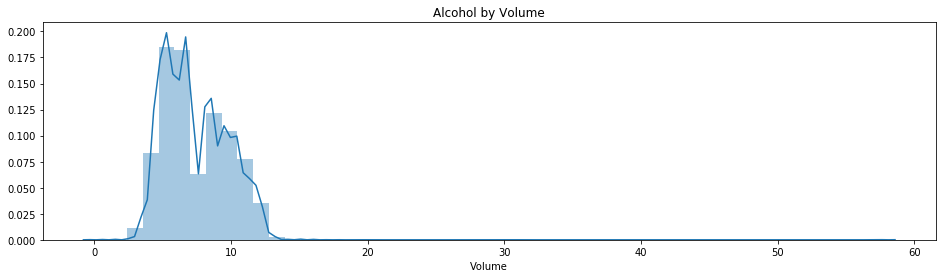

In [35]:
## Look at Alcohol by Volume in Beer

fig, ax = plt.subplots(figsize=[16,4])
sns.distplot(df['beer/ABV'], ax=ax)
plt.xlabel('Volume')
ax.set_title('Alcohol by Volume')
plt.show()

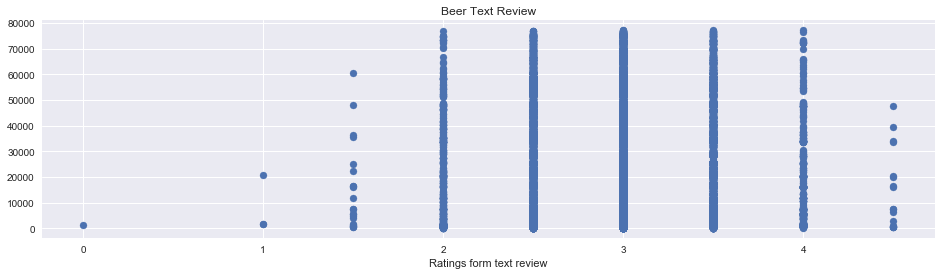

In [36]:
# ## Look at rating on beer's text review

fig= plt.figure(figsize=[16,4])
plt.style.use('seaborn')
plt.scatter(df['review/text_polarity'],y=df['beer/beerId'])
plt.xlabel('Ratings form text review')
plt.title('Beer Text Review')
plt.show()

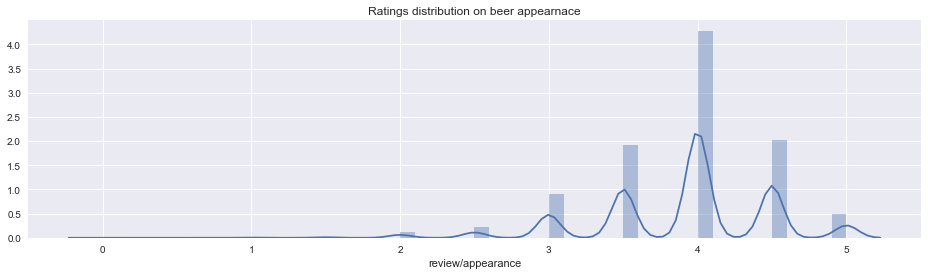

In [37]:
## Look at distribution of rating on beer's appearnace

fig, ax = plt.subplots(figsize=[16,4])
sns.distplot(df['review/appearance'], ax=ax)
ax.set_title('Ratings distribution on beer appearnace')
plt.show()

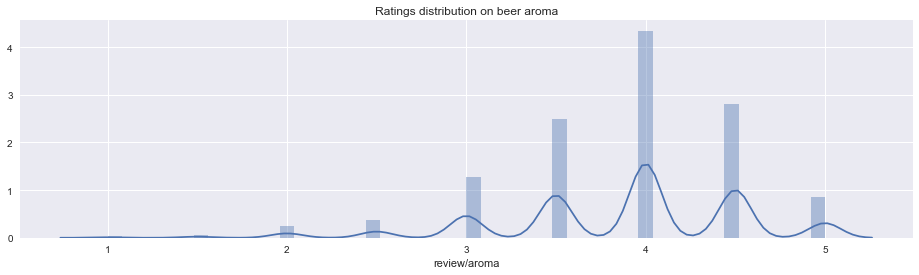

In [38]:
## Look at distribution of rating on beer's aroma

fig, ax = plt.subplots(figsize=[16,4])
sns.distplot(df['review/aroma'], ax=ax)
ax.set_title('Ratings distribution on beer aroma')
plt.show()

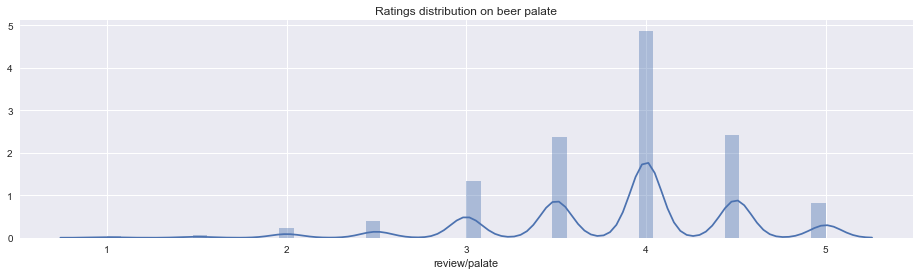

In [39]:
## Look at distribution of rating on beer's palate

fig, ax = plt.subplots(figsize=[16,4])
sns.distplot(df['review/palate'], ax=ax)
ax.set_title('Ratings distribution on beer palate')
plt.show()

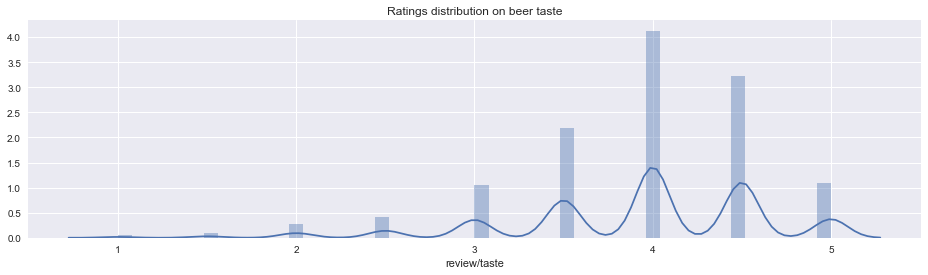

In [40]:
## Look at distribution of rating on beer's taste

fig, ax = plt.subplots(figsize=[16,4])
sns.distplot(df['review/taste'], ax=ax)
ax.set_title('Ratings distribution on beer taste')
plt.show()

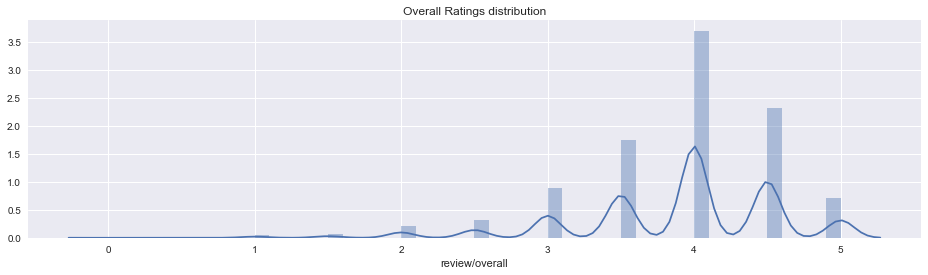

In [41]:
## Look at distribution of overall rating

fig, ax = plt.subplots(figsize=[16,4])
sns.distplot(df['review/overall'], ax=ax)
ax.set_title('Overall Ratings distribution')
plt.show()

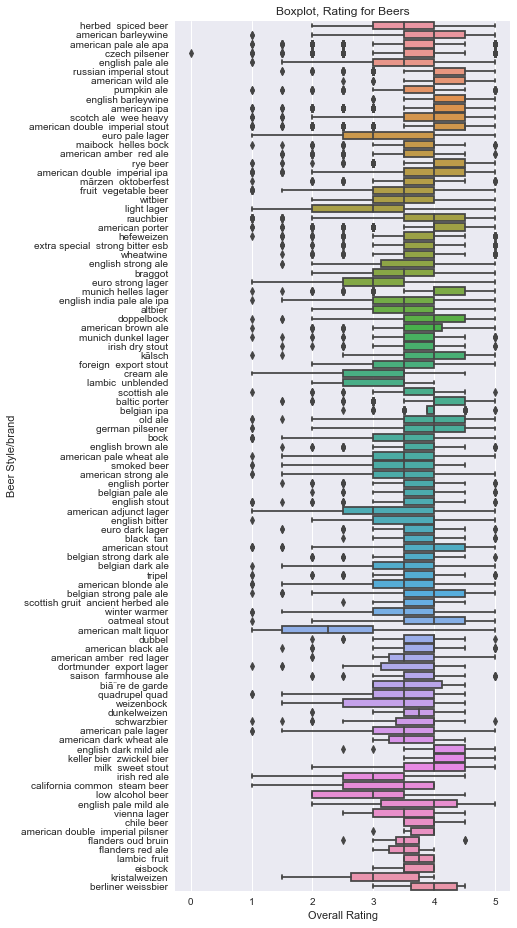

In [42]:
## Look at boxplot over the beer style/brand

fig, ax = plt.subplots(figsize=[6, 16])
sns.boxplot(
    data=df,
    y='beer/style',
    x='review/overall'
)
ax.set_title('Boxplot, Rating for Beers')
plt.xlabel('Overall Rating')
plt.ylabel('Beer Style/brand')
plt.show()

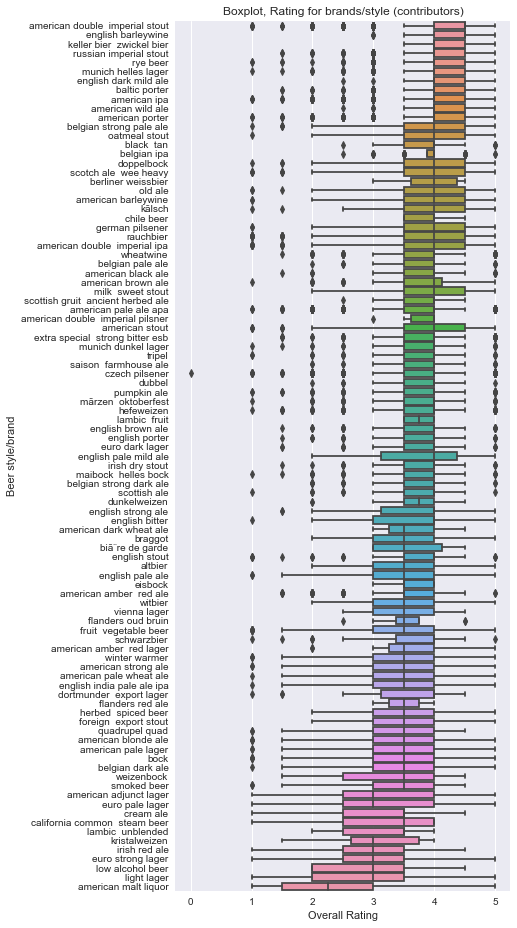

In [43]:
## see what brands is biggest contributor in rating?

df_cont = pd.concat([pd.Series(row['review/overall'], row['beer/style'].split(',')) for _, row in df.iterrows()]
                   ).reset_index()
df_cont.columns = ['beer/style', 'review/overall']
df_cont['mean_rating'] = df_cont.groupby(['beer/style'])['review/overall'].transform('mean')

## Look at boxplot over the brands (contributors)
fig, ax = plt.subplots(figsize=[6, 16])
sns.boxplot(
    data=df_cont.sort_values('mean_rating', ascending=False),
    y='beer/style',
    x='review/overall'
)
ax.set_title('Boxplot, Rating for brands/style (contributors)')
plt.xlabel('Overall Rating')
plt.ylabel('Beer style/brand')
plt.show()

In [44]:
## top 10 contributors

df_cont.groupby(['beer/style'])['review/overall'].mean().sort_values(ascending=False).head(10)

beer/style
american double  imperial stout    4.326919
english barleywine                 4.233333
keller bier  zwickel bier          4.184211
russian imperial stout             4.168061
rye beer                           4.162362
munich helles lager                4.096115
english dark mild ale              4.062500
baltic porter                      4.047030
american ipa                       4.045082
american wild ale                  4.040000
Name: review/overall, dtype: float64

In [45]:
df_cont = pd.concat([pd.Series(row['beer/ABV'],
                              row['beer/style'].split(',')) for _, row in df.iterrows()]
         ).reset_index()
df_cont.columns = ['beer/style', 'review/overall']
df_cont['mean_rating'] = df_cont.groupby(['beer/style'])['review/overall'].transform('mean')

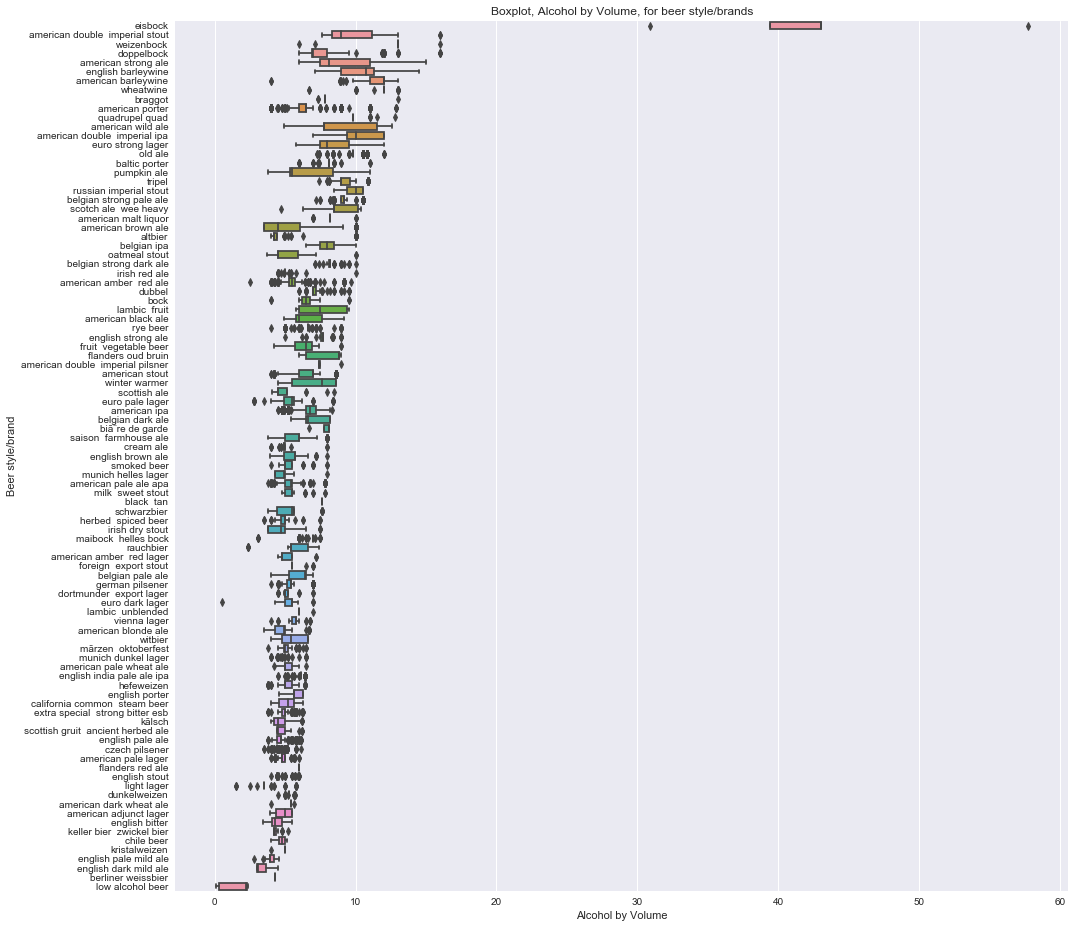

In [46]:
## Look at boxplot over the style/brand (contributors)

df_cont = pd.concat([pd.Series(row['beer/ABV'],
                              row['beer/style'].split(',')) for _, row in df.iterrows()]
         ).reset_index()
df_cont.columns = ['beer/style', 'beer/ABV']

## Look at boxplot over the style/brand

fig, ax = plt.subplots(figsize=[16, 16])
sns.boxplot(
    data=df_cont.sort_values('beer/ABV', ascending=False),
    y='beer/style',
    x='beer/ABV'
)
ax.set_title('Boxplot, Alcohol by Volume, for beer style/brands')
plt.xlabel('Alcohol by Volume')
plt.ylabel('Beer style/brand')
plt.show()

In [47]:
# growth/reduction of rating acc. to years

df_cont = pd.concat([pd.Series(row['review/overall'],
                              row['beer/style'].split(',')) for _, row in df.iterrows()]
         ).reset_index()
df_cont.columns = ['beer/style', 'review/overall']
df_cont['review/year']=df['review/year']

In [48]:
df_cont['review/year'].value_counts()

2011    8426
2010    7308
2009    6536
2008    4504
2007    3035
2006    2932
2005    1971
2004    1175
2003     861
2002     417
2012     297
2001      27
2000       7
1999       4
Name: review/year, dtype: int64

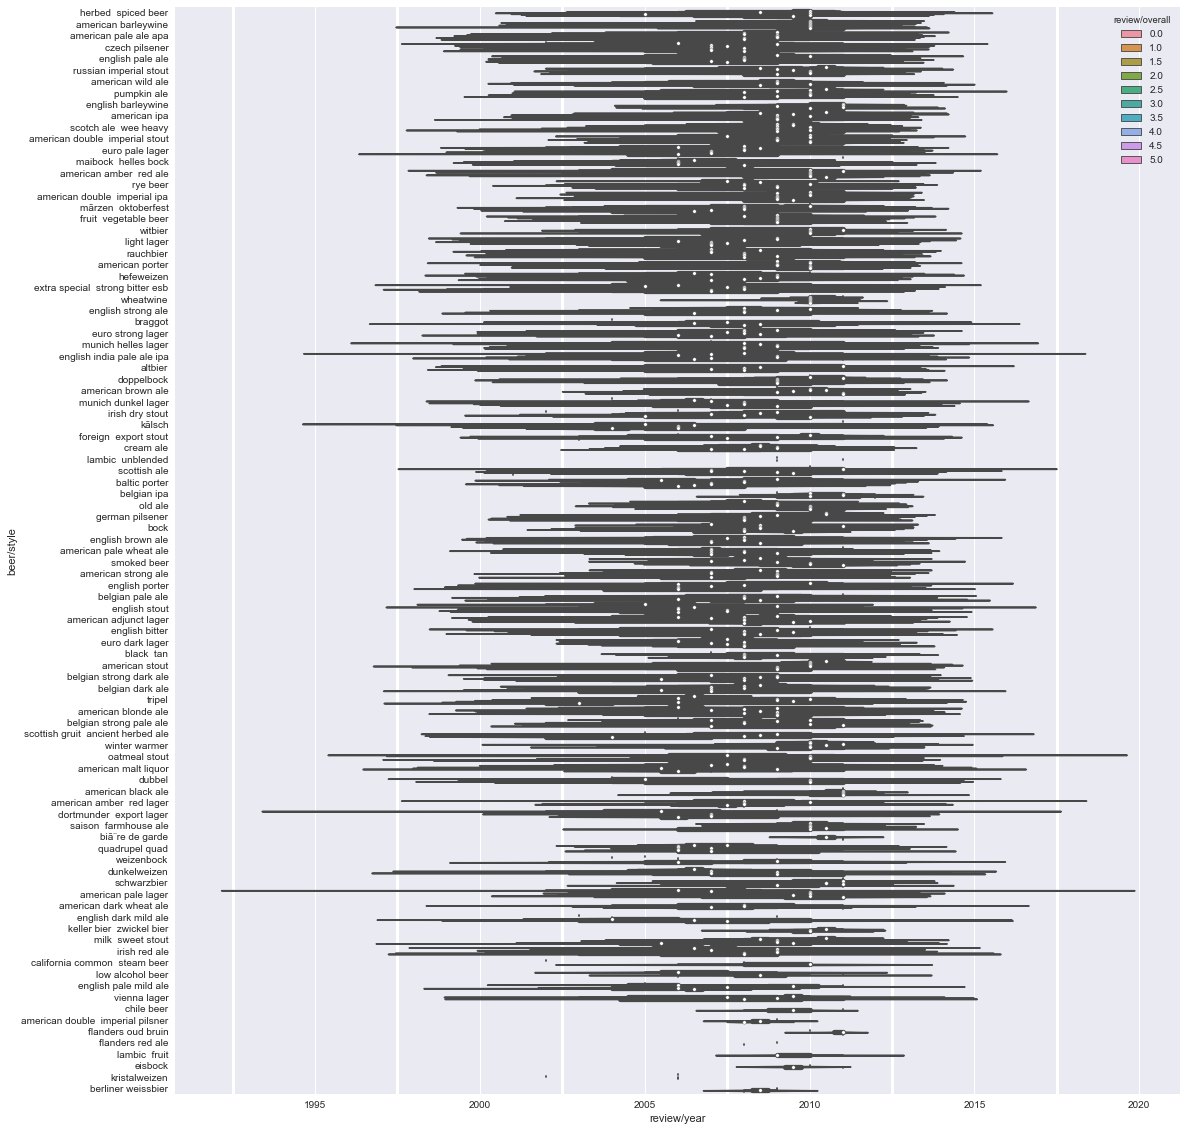

In [49]:
## Try to get ratings revolution acc. to years passing from beer style/brand

fig = plt.figure(figsize=(18,20))

LOOKBACK_YEARS = 14
REGISTRATION_YEAR = 2012

filtered_years = df_cont[df_cont['review/year'] > REGISTRATION_YEAR - LOOKBACK_YEARS]

ax1 = sns.violinplot('review/year', "beer/style", data=filtered_years, hue='review/overall')

ax1.minorticks_on()
ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.grid(which='minor', axis='x', linewidth=3)

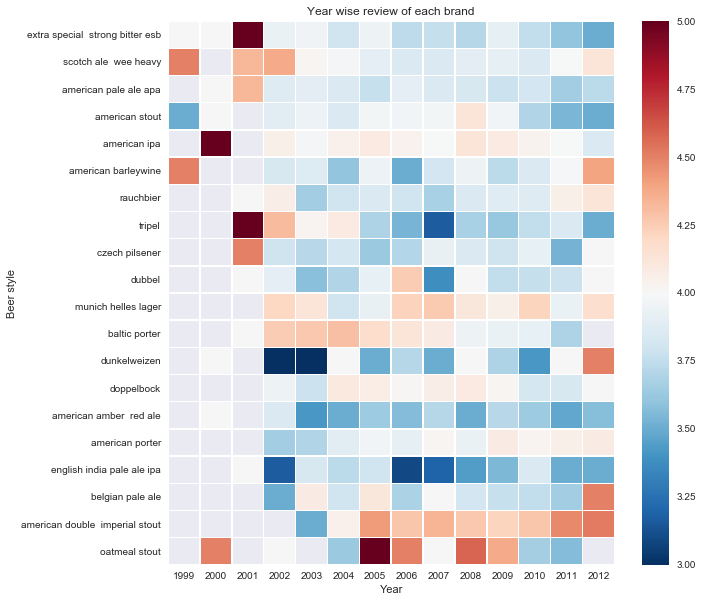

In [50]:
## What about quality(rating) in years
## Look at goodsflow
flow = pd.crosstab(
    df['beer/style'],
    df['review/year'],
    df['review/overall'], aggfunc='mean'
)
flow['tot'] = flow.sum(axis=1)
flow = flow.sort_values('tot', ascending=False)
flow = flow.drop('tot', axis=1)

fig, ax = plt.subplots(figsize=[10,10])
sns.heatmap(flow.head(20), cmap='RdBu_r', linewidths=.5)
ax.set_title('Year wise review of each brand')
plt.xlabel('Year')
plt.ylabel('Beer style')
plt.show()

**Extra Special stron butter esb** , **DunkelWeizen** are getting better in terms of quality

In [51]:
# Above graph is not so clear

df_cont["beerID"]=df['beer/beerId']
df_cont_t=df_cont

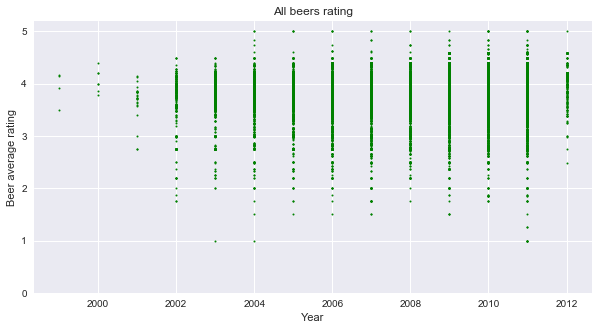

In [52]:
dftmp = df_cont[['beerID', 'review/year']].set_index('beerID').join(
    df_cont_t[['beerID','review/overall']].groupby('beerID').mean())

plt.figure(figsize=(10,5))
plt.plot(dftmp['review/year'], dftmp['review/overall'],"g.", markersize=4)
plt.xlabel('Year')
plt.ylabel('Beer average rating')
plt.title('All beers rating')
plt.ylim(0,)
plt.show()

We have more manufacture of bear in year of **2011 & 2010**

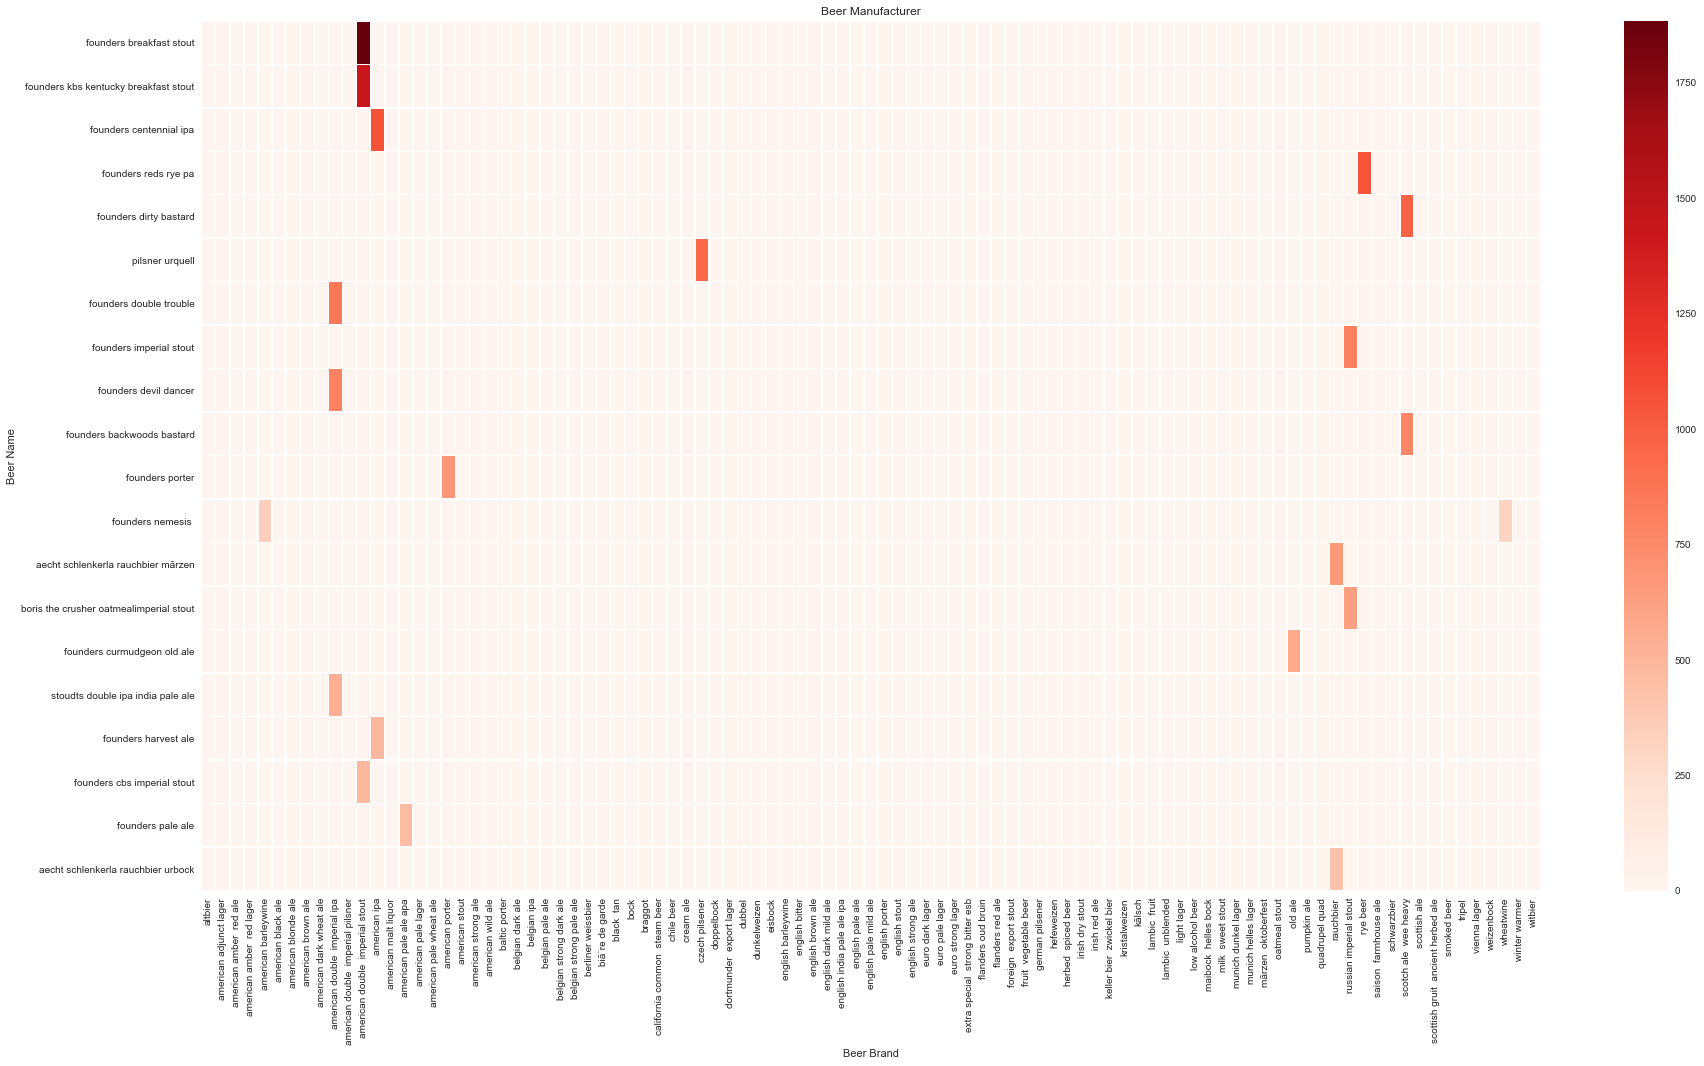

In [53]:
## Look at beer manufacturer
flow = pd.crosstab(
    df['beer/name'],
    df['beer/style']
)
flow['tot'] = flow.sum(axis=1)
flow = flow.sort_values('tot', ascending=False)
flow = flow.drop('tot', axis=1)

fig, ax = plt.subplots(figsize=[30,16])
sns.heatmap(flow.head(20), cmap='Reds', linewidths=.5)
ax.set_title('Beer Manufacturer')
plt.xlabel('Beer Brand')
plt.ylabel('Beer Name')
plt.show()

### double click the graph

Biggest manufacturer brand is **American Double Impericl Stout**

Most manufactured beer is **Founders Breakfast Stout**

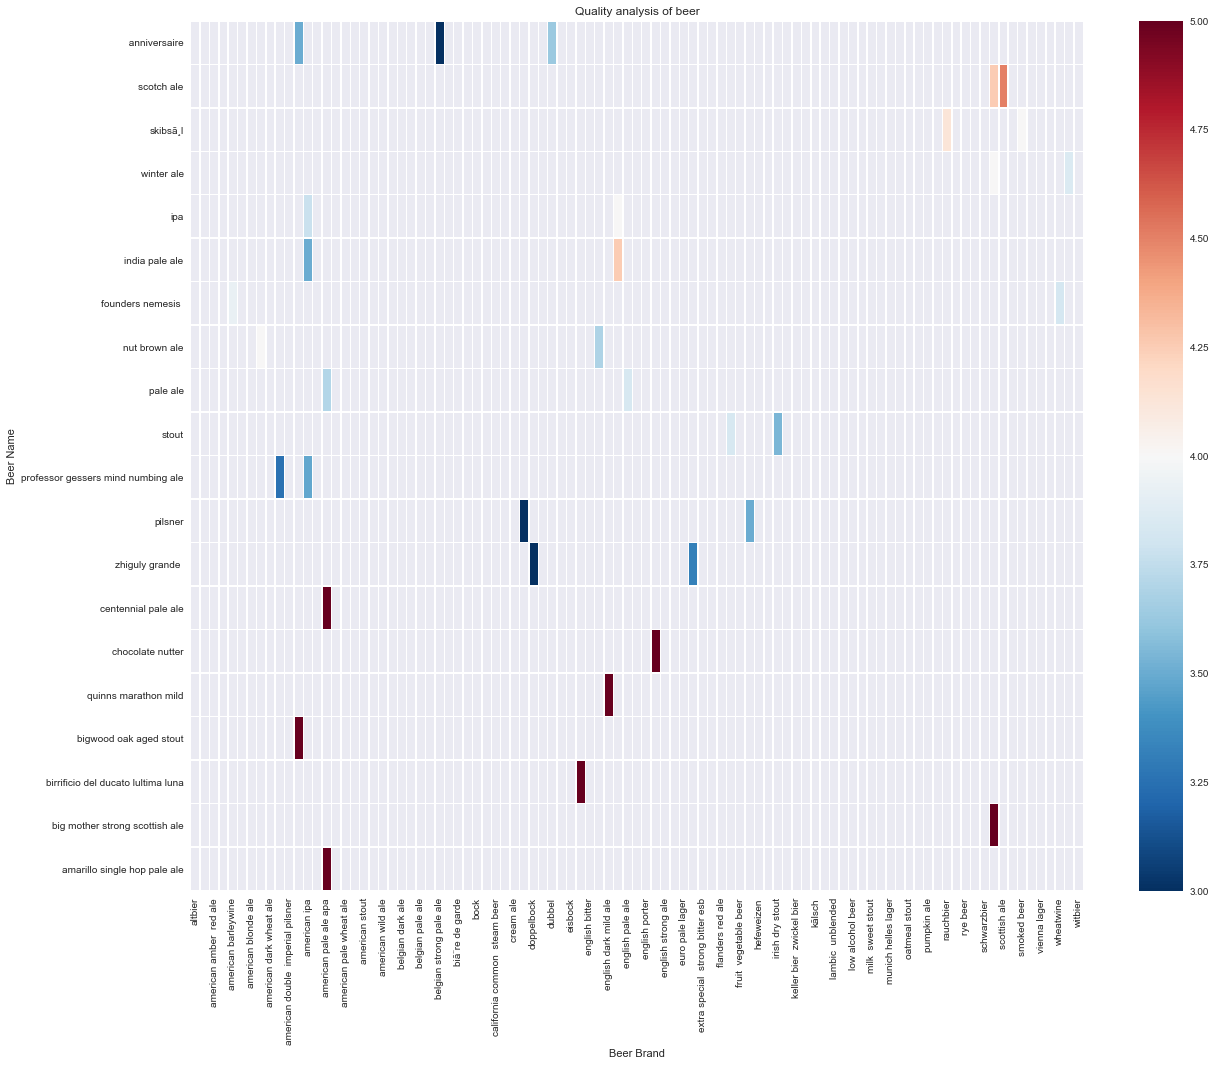

In [54]:
## What about quality(rating)
## Look at goodsflow
flow = pd.crosstab(
    df['beer/name'],
    df['beer/style'],
    df['review/overall'], aggfunc='mean'
)
flow['tot'] = flow.sum(axis=1)
flow = flow.sort_values('tot', ascending=False)
flow = flow.drop('tot', axis=1)

fig, ax = plt.subplots(figsize=[20,16])
sns.heatmap(flow.head(20), cmap='RdBu_r', linewidths=.5)
ax.set_title('Quality analysis of beer')
plt.xlabel('Beer Brand')
plt.ylabel('Beer Name')
plt.show()

In [55]:
df.head()

,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,...,review/timeStruct,review/timeUnix,user/ageInSeconds,user/birthdayRaw,user/birthdayUnix,user/gender,user/profileName,review/year,review/month,review/text_polarity
0,40163,5.0,46634,14338,chiostro,herbed spiced beer,4.0,4.0,4.0,4.0,...,"{'min': 38, 'hour': 3, 'mday': 16, 'sec': 10, ...",1229398690,NaN,NaN,NaN,NaN,RblWthACoz,2008,12,2.5
1,8135,11.0,3003,395,bearded pats barleywine,american barleywine,4.0,3.5,3.5,3.5,...,"{'min': 38, 'hour': 23, 'mday': 8, 'sec': 58, ...",1218238738,NaN,NaN,NaN,NaN,BeerSox,2008,8,3.0
2,10529,4.7,961,365,naughty nellies ale,american pale ale apa,3.5,4.0,3.5,3.5,...,"{'min': 7, 'hour': 18, 'mday': 26, 'sec': 2, '...",1101492422,NaN,NaN,NaN,Male,mschofield,2004,11,3.0
3,44610,4.4,429,1,pilsner urquell,czech pilsener,3.0,3.0,2.5,3.0,...,"{'min': 7, 'hour': 1, 'mday': 20, 'sec': 5, 'y...",1308532025,1.209827e+09,"Aug 10, 1976",208508400.0,Male,molegar76,2011,6,3.5
4,37062,4.4,4904,1417,black sheep ale special,english pale ale,4.0,3.0,3.0,3.5,...,"{'min': 51, 'hour': 6, 'mday': 12, 'sec': 48, ...",1299912708,NaN,NaN,NaN,NaN,Brewbro000,2011,3,3.5


### Modeling

In [56]:
names=['beer/ABV','review/appearance','review/aroma',
       'review/palate','review/taste','review/month','review/text_polarity']

## Classification Problem
df['review/overall']=df['review/overall'].astype('str')

In [57]:
x = df[names]
y = df['review/overall']

In [58]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=12)

**Gausian Naive Bayes**

In [59]:
model_nb=GaussianNB()
model_nb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [60]:
y_pred = model_nb.predict(x_test)
print('Accuracy of Naive Bayes classifier on test set: {:.2f}'.format(model_nb.score(x_test, y_test)))

Accuracy of Naive Bayes classifier on test set: 0.49


In [61]:
confusion_matrix_nb = confusion_matrix(y_test, y_pred)
print(confusion_matrix_nb)
print(classification_report(y_test,y_pred))

[[  26    8   17    1    1    0    0    0    0]
 [   8   20   41    8    6    1    0    0    0]
 [   7   21  130   33   40   10    3    0    0]
 [   1   11   71   65  117   37   18    2    0]
 [   1    2   40   71  456  277  123   18    5]
 [   0    1    7   21  298  734  757  124   17]
 [   0    0    5   10  129  521 2429 1003  106]
 [   0    0    1    1   26   75  910 1266  337]
 [   0    0    1    0    2   12   99  284  378]]
              precision    recall  f1-score   support

         1.0       0.60      0.49      0.54        53
         1.5       0.32      0.24      0.27        84
         2.0       0.42      0.53      0.47       244
         2.5       0.31      0.20      0.24       322
         3.0       0.42      0.46      0.44       993
         3.5       0.44      0.37      0.40      1959
         4.0       0.56      0.58      0.57      4203
         4.5       0.47      0.48      0.48      2616
         5.0       0.45      0.49      0.47       776

    accuracy             

**K- Nearest Neighbor**

In [62]:
model_knn=KNeighborsClassifier(n_neighbors=5,metric='euclidean')
model_knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [72]:
y_pred = model_knn.predict(x_test)
print('Accuracy of K Nearest Neighbor classifier on test set: {:.2f}'.format(model_knn.score(x_test, y_test)))

Accuracy of K Nearest Neighbor classifier on test set: 0.45


In [64]:
confusion_matrix_knn = confusion_matrix(y_test, y_pred)
print(confusion_matrix_knn)
print(classification_report(y_test,y_pred))

[[  12   18   15    6    1    1    0    0    0]
 [  10   16   29   16   10    3    0    0    0]
 [   8   13   79   80   41   21    2    0    0]
 [   0    6   43   86  105   55   23    4    0]
 [   1    3   31   82  387  299  170   19    1]
 [   0    2    8   41  303  732  772   97    4]
 [   0    0    5    8  129  703 2548  766   44]
 [   0    0    0    1   22  151 1314 1003  125]
 [   0    0    0    0    7   15  220  342  192]]
              precision    recall  f1-score   support

         1.0       0.39      0.23      0.29        53
         1.5       0.28      0.19      0.23        84
         2.0       0.38      0.32      0.35       244
         2.5       0.27      0.27      0.27       322
         3.0       0.39      0.39      0.39       993
         3.5       0.37      0.37      0.37      1959
         4.0       0.50      0.61      0.55      4203
         4.5       0.45      0.38      0.41      2616
         5.0       0.52      0.25      0.34       776

    accuracy             

**Linear Discriminant Analysis**

In [66]:
model_lda=LinearDiscriminantAnalysis()
model_lda.fit(x_train,y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [69]:
y_pred = model_lda.predict(x_test)
print('Accuracy of Linear Discriminant Analysis on test set: {:.2f}'.format(model_lda.score(x_test, y_test)))

Accuracy of Linear Discriminant Analysis on test set: 0.51


In [70]:
confusion_matrix_lda = confusion_matrix(y_test, y_pred)
print(confusion_matrix_lda)
print(classification_report(y_test,y_pred))

[[   0    0    0    0    0    0    0    0    0    0]
 [   0   26   10   16    1    0    0    0    0    0]
 [   0   20   11   41    7    5    0    0    0    0]
 [   0   16   14  128   42   36    5    3    0    0]
 [   0    2    9   62   77  120   29   22    1    0]
 [   1    2    2   36   77  422  261  180   12    0]
 [   1    0    0    6   16  254  577 1039   66    0]
 [   0    0    0    4    8   83  265 3302  534    7]
 [   0    0    0    0    0   11   27 1447 1098   33]
 [   0    0    0    1    0    2    3  152  512  106]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.39      0.49      0.44        53
         1.5       0.24      0.13      0.17        84
         2.0       0.44      0.52      0.48       244
         2.5       0.34      0.24      0.28       322
         3.0       0.45      0.42      0.44       993
         3.5       0.49      0.29      0.37      1959
         4.0       0.54      0.79   

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Validation

**Stratified KFold**

In [71]:
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors=7,metric='minkowski')))
models.append(('NB', GaussianNB()))
models.append(('LDA', LinearDiscriminantAnalysis()))
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=100, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=100.
  % (min_groups, self.n_splits)), UserWarning)


KNN: 0.461027 (0.033914)


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=100.
  % (min_groups, self.n_splits)), UserWarning)


NB: 0.491778 (0.030976)


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=100.
  % (min_groups, self.n_splits)), UserWarning)


LDA: 0.508802 (0.026042)


---------------END---------------